<a href="https://colab.research.google.com/github/alishaphaiju2006/AlishaPhaiju_AI_Final/blob/main/Final(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from google.colab import files
uploaded = files.upload()

Saving default of credit card clients.xls to default of credit card clients (4).xls


In [78]:
df = pd.read_excel("default of credit card clients.xls", header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [79]:
df.shape


(30000, 25)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   29669 non-null  object
 4   MARRIAGE                    29677 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [81]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,331
MARRIAGE,323
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [82]:
              #Rename Target Column

df.rename(columns={'default payment next month': 'default'}, inplace=True)


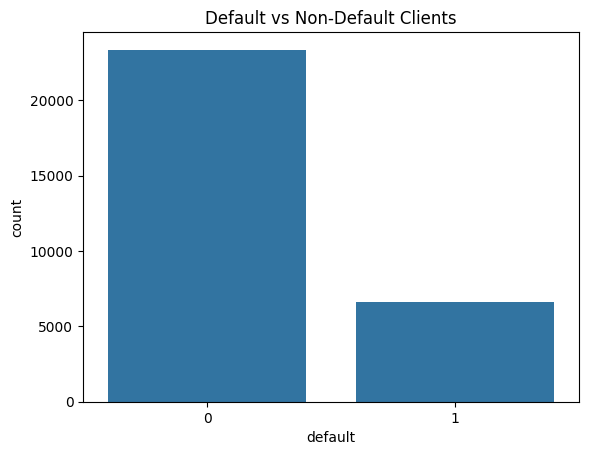

In [83]:
          #EDA (Target Distribution)

sns.countplot(x='default', data=df)
plt.title('Default vs Non-Default Clients')
plt.show()

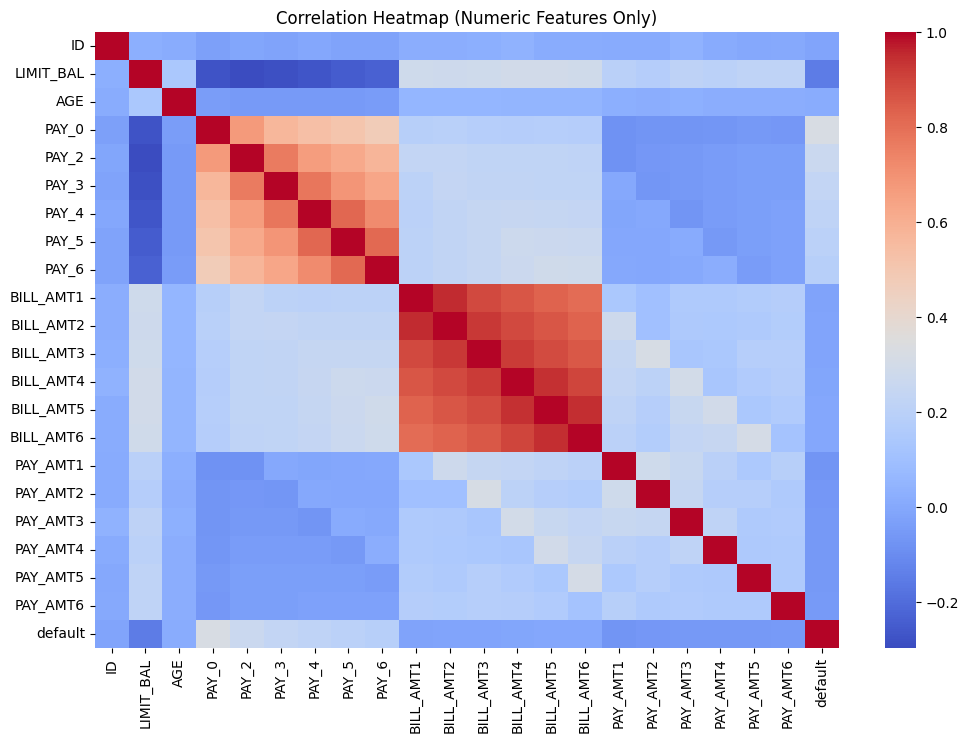

In [84]:
            #Correlation Heatmap

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

In [85]:
          #Feature / Target Split

df = pd.get_dummies(df, drop_first=True)

X = df.drop('default', axis=1)
y = df['default']

In [93]:
          #Train Test Split + Scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [87]:
          #Neural Network

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    max_iter=300,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

print(classification_report(y_test, y_pred_mlp))


              precision    recall  f1-score   support

           0       0.84      0.90      0.86      4673
           1       0.51      0.39      0.44      1327

    accuracy                           0.78      6000
   macro avg       0.67      0.64      0.65      6000
weighted avg       0.76      0.78      0.77      6000



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [88]:
                  #Classical Models

#Logistic Regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)


In [89]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


In [90]:
          #Model Comparison Table

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }

results = pd.DataFrame({
    'Logistic Regression': evaluate(y_test, y_pred_lr),
    'Decision Tree': evaluate(y_test, y_pred_dt),
    'Neural Network': evaluate(y_test, y_pred_mlp)
})

results

,Logistic Regression,Decision Tree,Neural Network
Accuracy,0.808667,0.723500,0.782333
Precision,0.690021,0.383099,0.510490
Recall,0.244913,0.409947,0.385079
F1-Score,0.361513,0.396068,0.439003


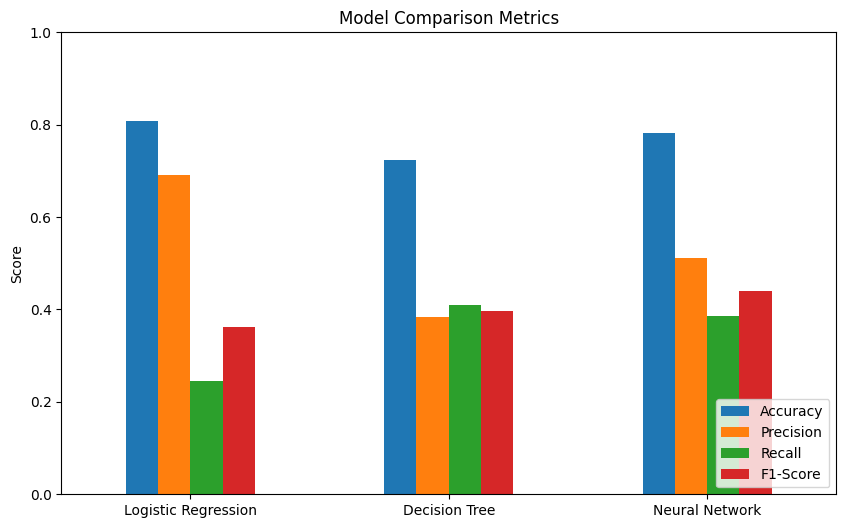

In [94]:
# Visualization - Model Comparison
results_plot = results.T
results_plot.plot(kind='bar', figsize=(10,6))
plt.title("Model Comparison Metrics")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

In [95]:
          #Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1'
)

grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [97]:
              #Feature Selection

from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=10)
selector.fit(abs(X), y)

scores = selector.scores_
top_features = X.columns[selector.get_support()]


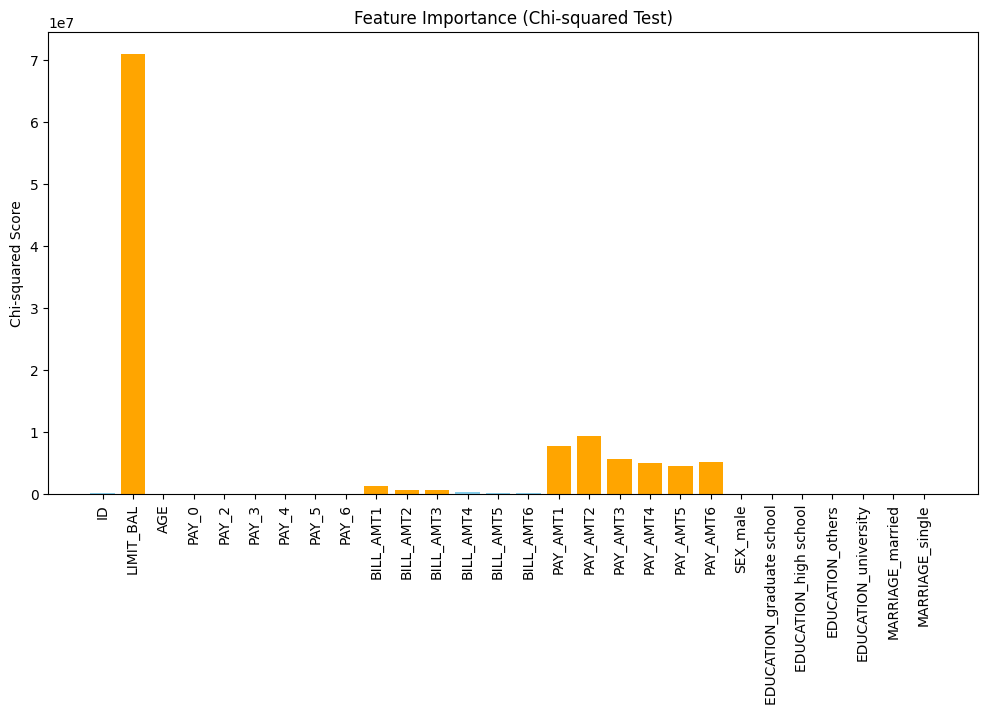

In [98]:
# Plot Chi-Squared Feature Importance
plt.figure(figsize=(12,6))
colors = ['orange' if col in top_features else 'skyblue' for col in X.columns]
plt.bar(X.columns, scores, color=colors)
plt.xticks(rotation=90)
plt.ylabel("Chi-squared Score")
plt.title("Feature Importance (Chi-squared Test)")
plt.show()

#Regression

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from google.colab import files
uploaded = files.upload()


Saving classroom_data.csv to classroom_data (2).csv


In [104]:
df = pd.read_csv('classroom_data.csv')
df.head()

,Length (L),Width (W),Height (H),Number of Students (N),"Airflow (Q, m^3/hr)",Heat Generation (W),Lighting Intensity (lux),Noise Level (dB),Ergonomic Comfort,"Classroom Layout (0=Rows, 1=Clusters, 2=Circles)",Visual Accessibility,Greenery (%),Time of Day (hrs),Dynamic Learning Outcome
0,9.498160,7.998681,3.457217,92,55.2,9200,630.409333,90.0,90.8,1,54.0,3.403935,10.295894,59.267435
1,11.802857,8.986987,3.188939,102,61.2,10200,793.725506,90.0,89.8,0,50.0,4.310338,15.848829,61.263619
2,10.927976,8.250667,3.946748,96,57.6,9600,518.177835,90.0,90.4,2,52.0,3.321733,15.265664,77.074178
3,10.394634,6.333210,2.828468,90,54.0,9000,507.524286,90.0,91.0,1,55.0,2.873968,8.154372,63.466506
4,8.624075,6.742321,3.381785,108,64.8,10800,300.161958,90.0,89.2,2,50.0,4.718181,12.967448,50.000000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Length (L)                                        15000 non-null  float64
 1   Width (W)                                         15000 non-null  float64
 2   Height (H)                                        15000 non-null  float64
 3   Number of Students (N)                            15000 non-null  int64  
 4   Airflow (Q, m^3/hr)                               15000 non-null  float64
 5   Heat Generation (W)                               15000 non-null  int64  
 6   Lighting Intensity (lux)                          15000 non-null  float64
 7   Noise Level (dB)                                  15000 non-null  float64
 8   Ergonomic Comfort                                 15000 non-null  float64
 9   Classroom Layout 

In [106]:
df.describe()

,Length (L),Width (W),Height (H),Number of Students (N),"Airflow (Q, m^3/hr)",Heat Generation (W),Lighting Intensity (lux),Noise Level (dB),Ergonomic Comfort,"Classroom Layout (0=Rows, 1=Clusters, 2=Circles)",Visual Accessibility,Greenery (%),Time of Day (hrs),Dynamic Learning Outcome
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.0,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,9.986259,8.010381,3.247941,84.749267,50.849560,8474.926667,601.190580,90.0,91.525073,0.996933,58.957667,4.959306,12.008183,67.540397
std,1.154763,1.148525,0.433629,19.820792,11.892475,1982.079187,232.129605,0.0,1.982079,0.814065,8.219980,2.898353,2.312302,8.747772
min,8.000047,6.000192,2.500008,51.000000,30.600000,5100.000000,200.038031,90.0,88.100000,0.000000,50.000000,0.000293,8.000220,50.000000
25%,8.986456,7.027831,2.870553,68.000000,40.800000,6800.000000,400.983145,90.0,89.800000,0.000000,50.000000,2.416110,9.993354,61.449840
50%,9.973889,8.023348,3.245313,85.000000,51.000000,8500.000000,598.565872,90.0,91.500000,1.000000,57.500000,4.971574,12.014526,67.484125
75%,10.993443,8.987443,3.623443,102.000000,61.200000,10200.000000,806.287736,90.0,93.200000,2.000000,66.000000,7.462396,14.022405,73.566452
max,11.999221,9.999699,3.999958,119.000000,71.400000,11900.000000,999.916033,90.0,94.900000,2.000000,74.500000,9.999920,15.998903,90.000000


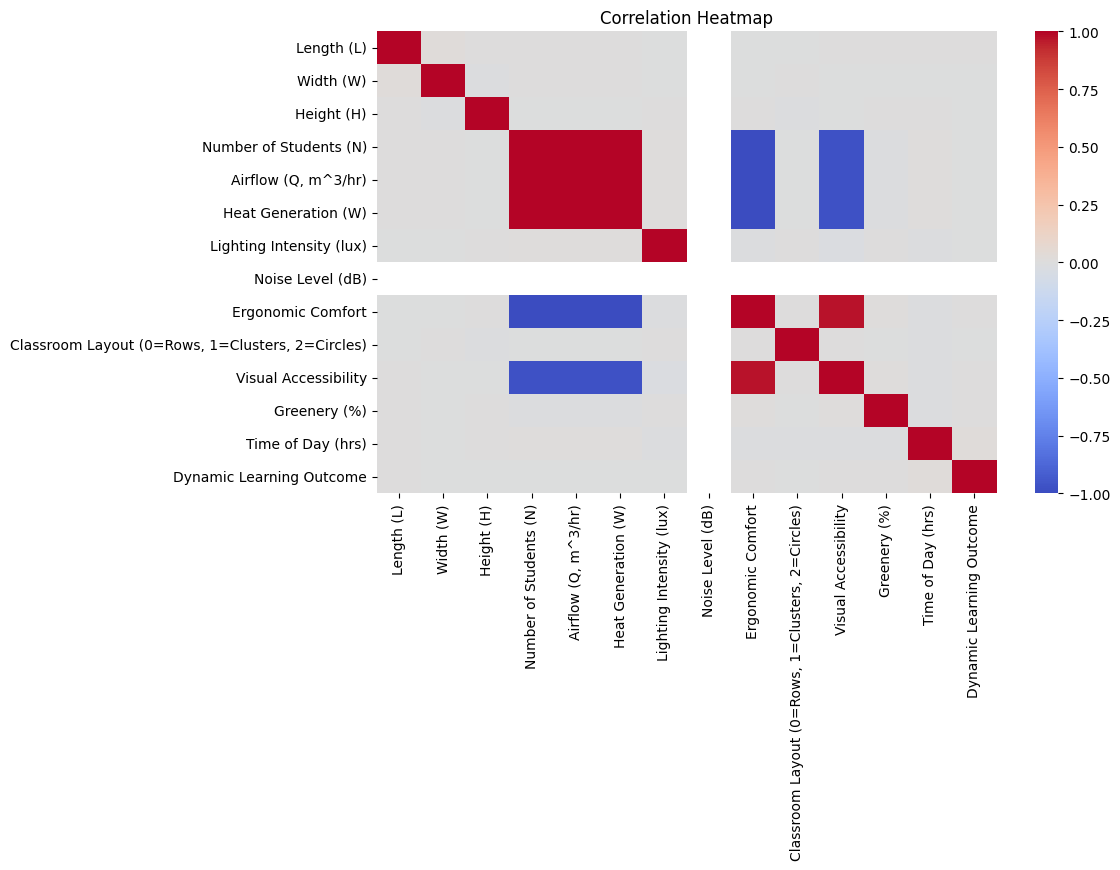

In [107]:
                  #EDA

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [108]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)

Index(['length_(l)', 'width_(w)', 'height_(h)', 'number_of_students_(n)',
       'airflow_(q,_m^3/hr)', 'heat_generation_(w)',
       'lighting_intensity_(lux)', 'noise_level_(db)', 'ergonomic_comfort',
       'classroom_layout_(0=rows,_1=clusters,_2=circles)',
       'visual_accessibility', 'greenery_(%)', 'time_of_day_(hrs)',
       'dynamic_learning_outcome'],
      dtype='object')


In [109]:
df = pd.get_dummies(df, columns=['classroom_layout_(0=rows,_1=clusters,_2=circles)'], drop_first=True)


In [110]:
          #Feature / Target Split

X = df.drop('dynamic_learning_outcome', axis=1)
y = df['dynamic_learning_outcome']

In [111]:
          #Train Test Split + Scaling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
              #Neural Network Regressor

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    max_iter=300,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)
y_pred_nn = mlp.predict(X_test_scaled)


In [113]:
            #Classical Regression Models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [114]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [115]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [116]:
                #Evaluation

def metrics(y_true, y_pred):
    return {
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred)
    }

pd.DataFrame({
    'Linear Regression': metrics(y_test, y_pred_lr),
    'Random Forest': metrics(y_test, y_pred_rf),
    'Neural Network': metrics(y_test, y_pred_nn)
})

,Linear Regression,Random Forest,Neural Network
RMSE,8.650254,8.805708,8.829635
R2,0.000234,-0.036023,-0.041661


In [119]:

# ========================
# 8. Feature Selection (RFE)
# ========================
from sklearn.feature_selection import RFE

rfe = RFE(LinearRegression(), n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)
selected_features = X.columns[rfe.support_]
print("Top 5 Selected Features:", list(selected_features))


Top 5 Selected Features: ['length_(l)', 'width_(w)', 'height_(h)', 'visual_accessibility', 'time_of_day_(hrs)']


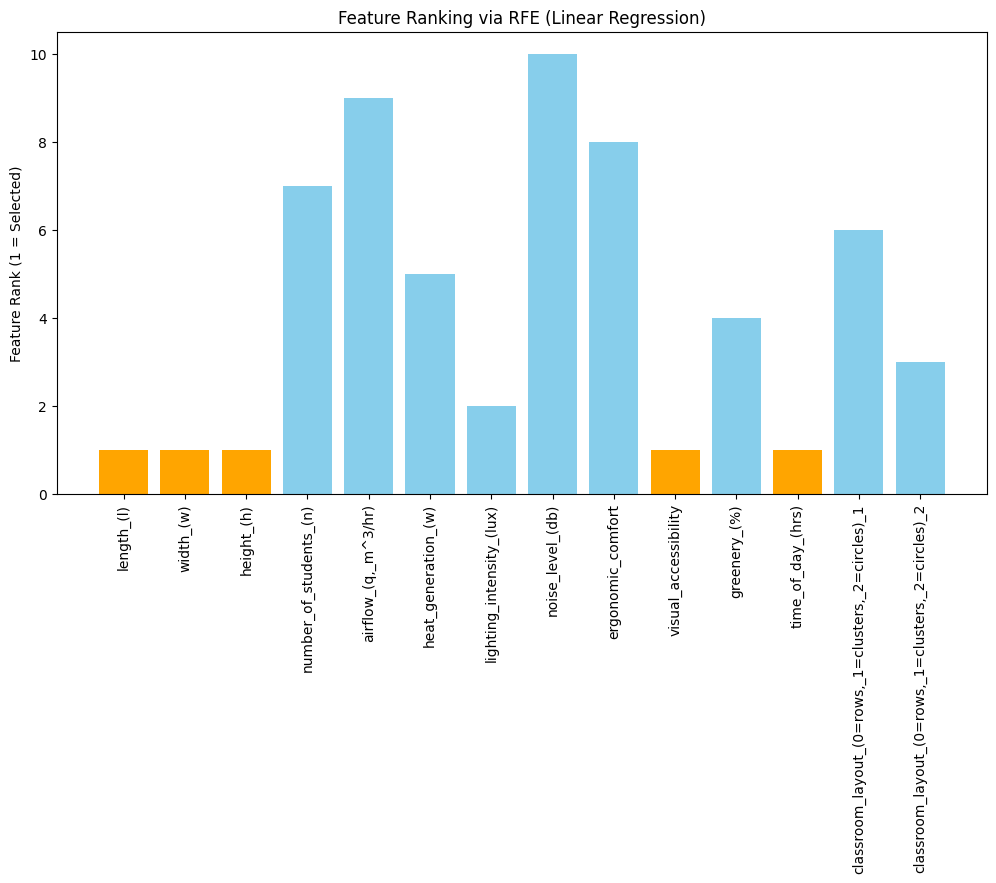

In [120]:

# Feature Ranking Plot
ranking = rfe.ranking_
plt.figure(figsize=(12,6))
plt.bar(X.columns, ranking, color=['orange' if r==1 else 'skyblue' for r in ranking])
plt.xticks(rotation=90)
plt.ylabel("Feature Rank (1 = Selected)")
plt.title("Feature Ranking via RFE (Linear Regression)")
plt.show()